# Simulación del crecimiento de grano de un policristal, red cuadrada en 2D

Se utiliza el modelo de Potts y Monte Carlo para la simulacion 

In [1]:
import numpy as np #Importo algebra Lineal
import matplotlib.pyplot as plt  #Importo librería de gráficos 
import copy

In [2]:

#Cargar los parametros iniciales 

# Carga de datos de la red y simulacion

n=10 #Tamaño de la red, tamaño de la matriz
q=1 #Numero de orientaciones de los granos "q=1, orientacion es 0 y 1"
MCS=2 #Numero de pasos de MC

#Carga de los parametros fisicos
Jota=1 #Energia del BDG 
k=1 #Cte boltzmann
T=1 #Temperatura


In [3]:
# Genero la matriz inicial con las distintas orientaciones

Mi=np.round(np.random.rand(n,n)*(q)).astype(int) #Matriz con las orientaciones, matriz de estado, matriz inicial Mi
print(Mi)
#Primero tengo que calcular la energia de M con la configuracion inicial
Ei=0 #Energia inicial

for i in range(0,n):
    for j in range(0,n):
        if Mi[i,j]==1:
            aux=1
        else:
            aux=0
            
        Ei=Ei+Jota*(1-aux) #Hamiltoniano
        
print('La energia inicial es', Ei)

[[1 0 0 1 0 1 0 1 0 0]
 [1 1 0 0 1 0 1 1 1 0]
 [1 1 0 1 0 0 1 1 1 1]
 [0 1 0 1 1 0 1 1 0 1]
 [1 1 0 1 0 0 1 1 1 1]
 [0 0 1 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 1 1 0 0 1 1 0 0 1]
 [1 1 1 1 1 0 1 0 1 1]
 [0 1 1 1 1 0 0 1 1 1]]
La energia inicial es 44


La idea es que, como es una red cuadrada, voy a elegir un elemento al azar, ese elemento va ser el (1,1), y lo voy a comparar con los primeros vecinos, es decir tengo que agarrar una matriz de 3x3 alrededor de ese elemento. "Notacion de indices de phyton"

In [4]:
#Calculo de la diferencia de energia y pasos de MC

contadorMCS=0

MCSvector=[]
EnergiaTotvector=[]
matricesM=[]

M=copy.copy(Mi) # M es Una copia de la matriz inicial, esta es la que voy a modificar


for pasosmontecarlo in range(1,MCS+1): #Pasos de MC 
    contadorMCS=contadorMCS+1  
    for puntos in range(0,n*n): #Todos los puntos de la red cuadrada
        
        E1=0 #Inicializo La energia de comparacion sin el cambio
        E2=0 #Inicializo La energia de comparacion con el cambio
        
        #Tengo que elegir la matriz Index Element State Matrix – IES, es la matriz local asociada de 3x3 
        #El medio es infinito, no tiene bordes el problema
        #Lo unico que se me ocurre es hacerlo por medio de una matriz ampliada
        
        matrizampliada=np.zeros([n+2,n+2])

        matrizampliada[1:n+1,1:n+1]=M #Cargo la matriz M
        matrizampliada[0,1:n+1]=M[n-1,0:n] #Hago la fila de arriba (la fila de arriba seria la abajo de M)
        matrizampliada[n+1,1:n+1]=M[0,0:n] #Hago la fila de abajo (la fila de abajo seria la de arriba de M)
        matrizampliada[1:n+1,0]=M[0:n,n-1] #Hago la fila de la izquierda
        matrizampliada[1:n+1,n+1]=M[0:n,0] #Hago la fila de la derecha
        #Asigno los valores de los extremos
        matrizampliada[0,0]=M[n-1,n-1]
        matrizampliada[0,n+1]=M[n-1,0]
        matrizampliada[n+1,0]=M[0,n-1]
        matrizampliada[n+1,n+1]=M[0,0]
       
        # Agarro un punto de red aleatorio
        
        auxi=(np.round(np.random.rand(1)*(n-1))).astype(int)
        auxj=(np.round(np.random.rand(1)*(n-1))).astype(int)
        auxantiguo=M[auxi,auxj] #Orientacion del punto aleatorio que elegi, ese punto es en IES es el (1,1)

        #Sumo 1 a los indices porque estos son los indices para agarrar de la matriz ampliada
        
        i=auxi[0]+1
        j=auxj[0]+1
        
        #La matriz IES de 3x3, tengo que calcular la energia sin el cambio IES y con el cambio IES2
        IES=matrizampliada[i-1:i+2,j-1:j+2]
        IES2=copy.copy(IES)
        
        #Elijo una orientacion aleatorio para reemplazar en el punto
        aleatorio=np.round(np.random.rand(1)*(q)).astype(int)
        IES2[1,1]=aleatorio
        
        #Tengo que recorrer los vecinos de M(1,1) de las matrices locales
        #Si son iguales es 1, si no lo son 0
        
        for l in range(0,3):
            for m in range(0,3):
                if IES[l,m]==IES[1,1]:
                    aux=1
                else:
                    aux=0
                    
                E1=E1+Jota*(1-aux) #Hamiltoniano

                if IES2[l,m]==IES2[1,1]:
                    aux2=1
                else:
                    aux2=0

                E2=E2+Jota*(1-aux2) #Hamiltoniano
        

        #Aca tengo que evaluar la diferencia de energia E2-E1, y si hago el cambio o no
        #Algoritmo de metropolis
        
        deltaE=E1-E2 #Energiasinelcambio-Energiaconelcambio
        
        #print('El paso montecarlo es', contadorMCS)
        #print('los puntos son', puntos)   
        #print('El valor de E1 es', E1)
        #print('El valor de E2 es', E2)
        #print('El valor de delta',deltaE)
        
        if deltaE<=0:
            M[auxi,auxj]=aleatorio
            
        elif deltaE>0:
            prob=np.exp(-deltaE/(k*T))
            aleatorioprob=np.random.rand(1)
            if prob>aleatorioprob: 
                M[auxi,auxj]=aleatorio

    Emcs=0   #Energia de M por cada paso monte carlo
    for i in range(0,n):
        for j in range(0,n):
            if M[i,j]==1:
                aux=1
            else:
                aux=0
            Emcs=Emcs+Jota*(1-aux) #Hamiltoniano


    EnergiaTotvector.append(Emcs)
    MCSvector.append(contadorMCS)
    matricesM.append(M) 


In [5]:
#Para probar como cambian las matrices

print(MCSvector)
print(EnergiaTotvector)
print(Mi-matricesM[0])
print(matricesM[0]-matricesM[1])
#print(matricesM[1]-matricesM[2])
#print(matricesM[2]-matricesM[3])
#print(matricesM[3]-matricesM[4])

[1, 2]
[50, 50]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -1 -1  1  0  1  0  1  0]
 [ 0  1  0  1 -1 -1  1  0  1  0]
 [ 0  0 -1  0  0  0  0  0  0  0]
 [ 1  0  0  1  0 -1  1  1  1  0]
 [ 0 -1  0  0  0  0 -1  0  0  0]
 [ 0 -1  0  0 -1  0 -1  0  0  0]
 [-1  0  1  0  0  0  0 -1  0  0]
 [ 1  0  0  0  0  0  0  0  1  1]
 [ 0  0  1  1  1  0 -1  0  0  0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Matriz inicial


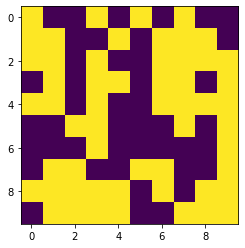

Matrices de paso MC del paso i


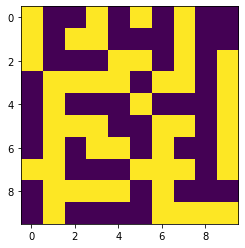

In [10]:
print('Matriz inicial')
plt.imshow(Mi)
plt.show()
print('Matrices de paso MC del paso i')
plt.imshow(matricesM[0])
plt.show()